In [61]:
import os
from dotenv import load_dotenv
import mysql.connector
#from my sql import connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ss
import numpy as np
#built in functions : os,datetime,random
#3rd party modules:datenv,numpy,pandas
#user defined functions: defined by uder for specific project
from SQLquery import read

In [62]:
query="""show tables;"""
#cursor.execute(query)
#tables = cursor.fetchall()

In [63]:
#tables = cursor.fetchall()

In [64]:
#for row in tables:
#    print(row)

In [65]:
df=read(query)

In [66]:
#cursor.column_names

In [67]:
#pd.DataFrame(data=tables,columns=cursor.column_names)

In [68]:
query="""select * from subcategories;"""
df=read(query)

In [69]:
query="""select * from salesdata;"""
df=read(query)


In [70]:
query="""SELECT sb.Subcatname, sum(s.TotalPrice) as Totalsales
FROM salesdata s
INNER JOIN subcategories sb  
ON s.SubcatID = sb.SubcatID
group by sb.subcatname
order by Totalsales desc
limit 5;"""
df=read(query)


In [71]:
#bar chart

labels=df['Subcatname'].values
sales = df['Totalsales'].astype(float).values

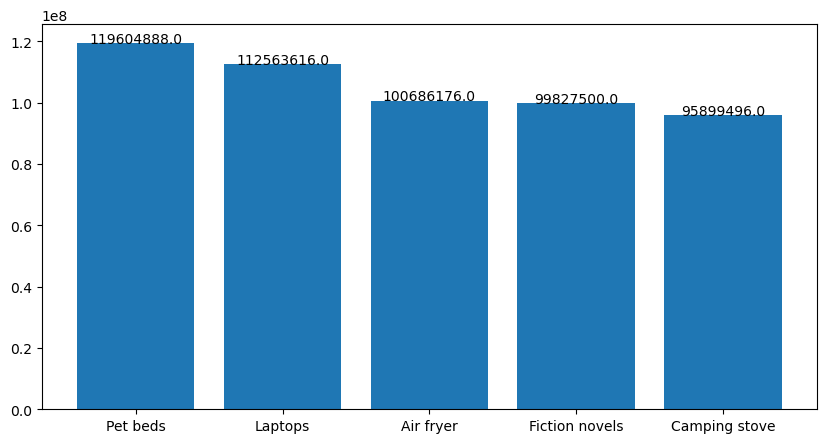

In [72]:
plt.figure(figsize=(10,5))
plt.bar(labels,sales)
for i in range(len(labels)):
    plt.annotate(text=sales[i],xy=(i,sales[i]),
                 horizontalalignment='center')


In [73]:
database

'swiftmarket'

In [74]:
#1
query = """select month(saledate), Monthname(SaleDate) as SaleMonth,sum(TotalPrice) as TotalSales
from Salesdata
group by month(saledate), SaleMonth
order by month(saledate), SaleMonth;"""
df=read(query)


findfont: Font family 'Agency FB' not found.
findfont: Font family 'Agency FB' not found.
findfont: Font family 'Agency FB' not found.
findfont: Font family 'Agency FB' not found.
findfont: Font family 'Agency FB' not found.


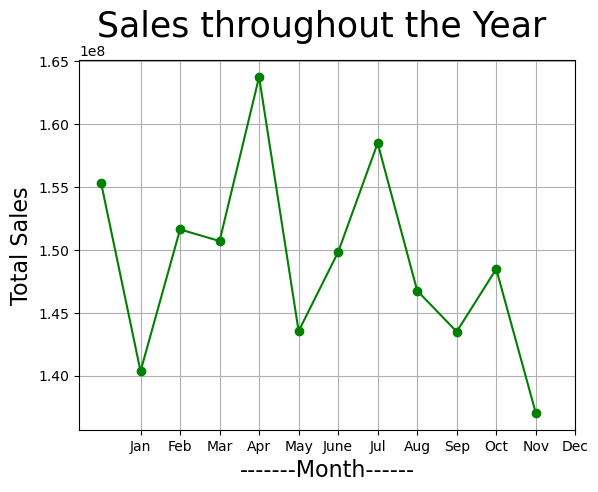

In [75]:
plt.plot(df['SaleMonth'],df['TotalSales'],marker="o",color='green')
plt.grid()
plt.title("Sales throughout the Year " , font = "Agency FB" , size = 25)
plt.xlabel("-------Month------",size=16)
plt.ylabel("Total Sales",size=16)   
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [76]:
#2
query="""select
months,
AVG(monthlysales) OVER (ORDER BY monthnum ROWS BETWEEN 3
PRECEDING AND CURRENT ROW) AS MovingAverage
from
(SELECT
month(saledate) monthnum,
monthname(SaleDate) as months,
sum(totalprice) as monthlysales
FROM Salesdata
Group by month(saledate),monthname(saledate))t;"""
df=read(query)


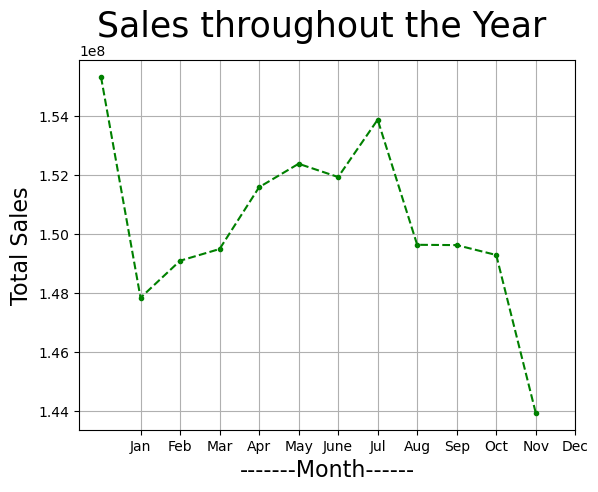

In [77]:
plt.plot(df['months'],df['MovingAverage'],marker=".",color='green',linestyle="--")
plt.grid()
plt.title("Sales throughout the Year "  , size = 25)
plt.xlabel("-------Month------",size=16)
plt.ylabel("Total Sales",size=16)   
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()
#plt.xkcd()

In [78]:
#4
query = """select s.employeeid,e.firstname,s.totalsales
from
(select employeeid,sum(totalprice) as totalsales
from salesdata
group by EmployeeID) s
join employees e
on s.employeeid=e.EmployeeID
order by s.totalsales desc;"""
df=read(query)


In [79]:
#5
query = """select employeeid,sum(totalprice) as TotalSales
from salesdata
group by employeeid
order by TotalSales desc
limit 6;
"""
df=read(query)


In [80]:
# 7
query="""SELECT
State,
COUNT(*) AS TotalCustomers
FROM Customers
GROUP BY State;"""
df=read(query)



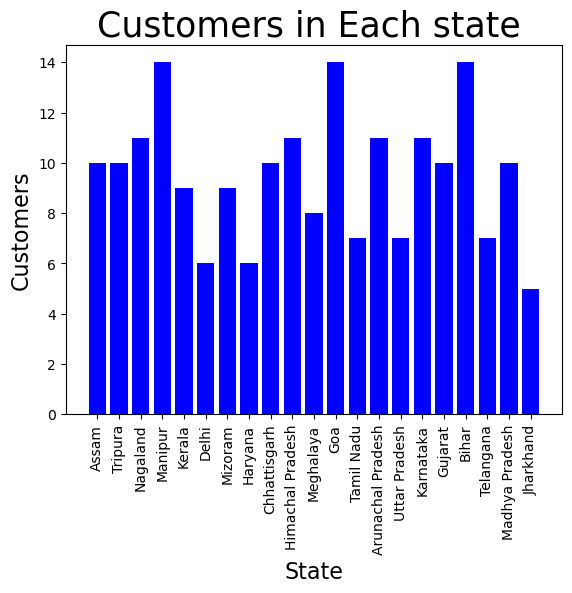

In [81]:
plt.bar(df['State'],df['TotalCustomers'],color='blue',linestyle="--")
plt.title("Customers in Each state "  , size = 25)
plt.xlabel("State",size=16)
plt.ylabel("Customers",size=16) 
plt.xticks(rotation=90)
plt.show()

In [82]:
#8
query="""SELECT s.SubcatID , sb.SubcatName , AVG(Quantity) AS AvgQuantity
FROM Salesdata s
JOIN Subcategories sb ON s.SubcatID = sb.Subcatid
GROUP BY s.SubcatID, sb.SubcatName
order by AvgQuantity desc;"""
df=read(query)


In [83]:
#9 
query="""SELECT suppliername,sum(totalprice) as totalsales
from salesdata as s
join subcategories sc on s.subcatid = sc.subcatid
join suppliers sp on sc.supplierid = sp.supplierid
group by suppliername
order by totalsales
limit 1;
"""
df=read(query)


In [84]:
#10
query="""SELECT c.state , sum(totalprice) as totalRevenue
from salesdata s
join customers c on s.customerid=c.customerid
group by c.state
"""
df=read(query)


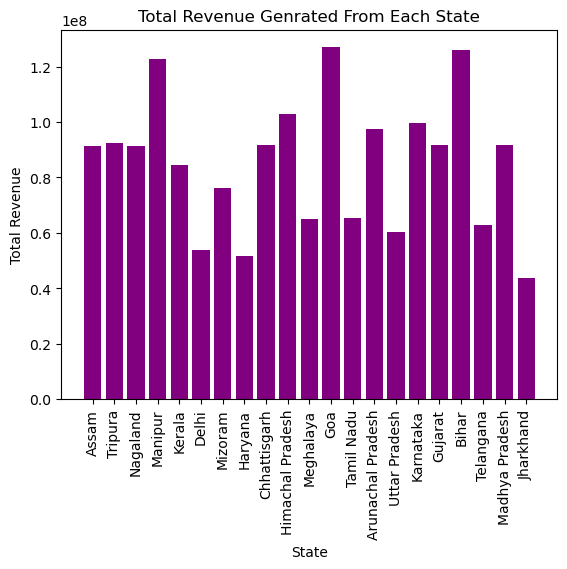

In [85]:
plt.bar(df['state'],df['totalRevenue'],color="purple")
plt.title("Total Revenue Genrated From Each State")
plt.xlabel("State")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.show()

In [86]:
#11
query="""SELECT c.FirstName , count(*) as totalsales
from salesdata s
join customers c on s.customerid=c.customerid
group by c.FirstName,s.customerid
"""
df=read(query)


In [87]:
#12
query="""select department,sum(salary) as totalsalary
from employees
group by department;
"""
df=read(query)


Text(0, 0.5, 'Total Salary Expenditure')

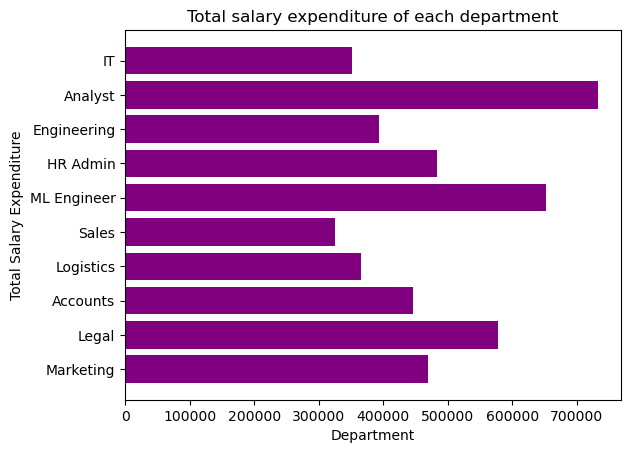

In [88]:
plt.barh(df['department'],df['totalsalary'],color="purple")
plt.title("Total salary expenditure of each department")
plt.xlabel("Department")
plt.ylabel("Total Salary Expenditure")



In [89]:
#13
query="""select subcatname,avg(unitprice) as UnitPrice
from subcategories
group by subcatname
order by UnitPrice desc
limit 3;
"""
df=read(query)


In [90]:
#14
query="""SELECT c.CategoryName, SUM(TotalPrice) AS TotalRevenue
FROM Salesdata s
JOIN Subcategories sc ON s.SubcatID = sc.SubcatID
JOIN Categories c ON sc.CategoryID = c.CategoryID
GROUP BY c.CategoryName;
""" 
df=read(query)


Text(0, 0.5, 'TotalRevenvue')

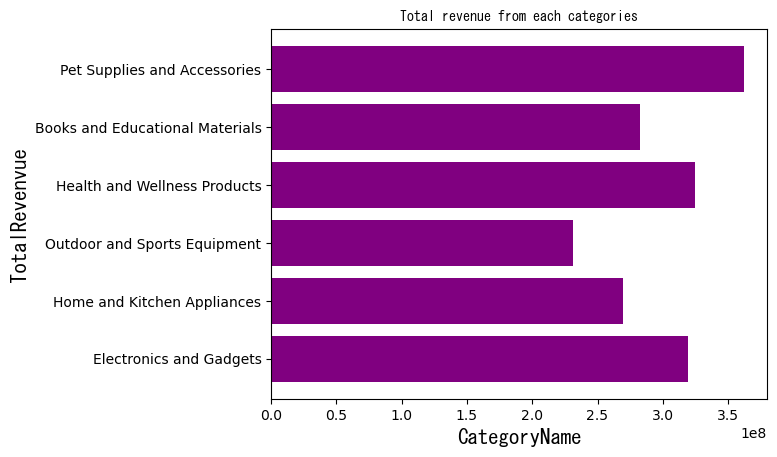

In [91]:
plt.barh(df['CategoryName'],df['TotalRevenue'],color="purple")
plt.title("Total revenue from each categories",size=40,font='MS Gothic')
plt.xlabel("CategoryName",font='MS Gothic',size=15)
plt.ylabel("TotalRevenvue",font='MS Gothic',size=15)

In [92]:
query="""select * from salesdata"""
df=read(query)
